In [1]:
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt

#img1=cv.imread('/home/naveen/Datasets/test_images/face.jpg')
face_cascade=cv.CascadeClassifier('/home/naveen/opencv/data/haarcascades_cuda/haarcascade_frontalface_default.xml')
eye_cascade=cv.CascadeClassifier('/home/naveen/opencv/data/haarcascades_cuda/haarcascade_eye.xml')

def read_image(file_name,path='/home/naveen/Datasets/test_images/'):
    """
        reads an image from the location specified---
        
        Arguments:
        
        path: file_location
        file_name: name of th file (with extention)
        
        Returns
        
        image file readed as ndarray
    """
    return cv.imread(path+str(file_name))

img=cv.imread('/home/naveen/Datasets/test_images/faces1.jpg')
#img=cv.imread('anim_char.png')
gray=cv.cvtColor(img,cv.COLOR_BGR2GRAY)
plt.imshow(gray)
#gray
#print(img1.shape)
#print(img.shape)

In [ ]:
%matplotlib inline
faces=face_cascade.detectMultiScale(gray,1.3,5)
for (x,y,w,h) in faces:
    cv.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2)
    roi_gray=gray[y:y+h,x:x+w]
    roi_color=img[y:y+h,x:x+w]
    #applying eyes cascade
    eyes=eye_cascade.detectMultiScale(roi_gray)
    for(ex,ey,ew,eh) in eyes:
        cv.rectangle(roi_color,(ex,ey),(ex+ew,ey+eh),(0,255,0),2)

cv.imshow('img',img)
plt.imshow(img)
cv.waitKey(0)
cv.destroyAllWindows()

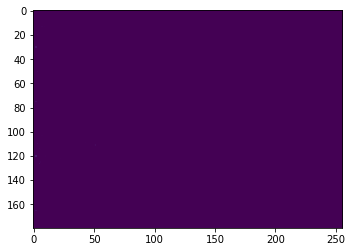

In [10]:
#----Hue histogram-----
img=read_image("anim_solo1.jpg")

hsv=cv.cvtColor(img,cv.COLOR_BGR2HSV)
hist=cv.calcHist([hsv],[0, 1],None,[180,256],[0,180,0,256])
plt.imshow(img)
plt.imshow(hist)

In [3]:
###----Downloading images from site-------(safebooru/solo)

from six.moves import urllib
from bs4 import BeautifulSoup #for webscrapping
import urllib3

http=urllib3.PoolManager()
url="https://safebooru.org/index.php?page=post&s=list&tags=solo"
#url="https://safebooru.org/index.php?page=post&s=list&tags=solo" #url of the page has images
#html=urllib.request.urlretrieve(url)
html=http.request('GET',url)
soup=BeautifulSoup(html,"lxml")

imgs=soup.findAll("div",{"class":"preview"})
for img in imgs:
    print(img.a["href"].split("imgurl=")[1])

In [ ]:
/usr/lib/python3/dist-packages/bs4/__init__.py:166: UserWarning: No parser was explicitly specified, so I'm using the best available HTML parser for this system ("lxml"). This usually isn't a problem, but if you run this code on another system, or in a different virtual environment, it may use a different parser and behave differently.

To get rid of this warning, change this:

 BeautifulSoup([your markup])

to this:

 BeautifulSoup([your markup], "lxml")

  markup_type=markup_type))

